# Figure 11.9 HadEX3 maps

Author: Mathias Hauser

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplotutils as mpu
import numpy as np

import conf
import hadex3
from utils import plot

%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rc('font', size=11)

In [2]:
FIGURE_FOLDER = "Figure_11.9_HadEX3_maps"

## Load data

In [3]:
TXx = hadex3.HadEx3.read_file("TXx")

In [4]:
TX90p = hadex3.HadEx3.read_file("TX90p")

# convert from % to days
TX90p = TX90p * 365 / 100

In [5]:
TNn = hadex3.HadEx3.read_file("TNn")

## Calculate theil slopes

only from 1960 on as this is more robust

In [6]:
TXx_theil_1960 = hadex3.theil_after_dunn(TXx, time=slice(1960, 2018), alpha=0.1)
TX90p_theil_1960 = hadex3.theil_after_dunn(TX90p, time=slice(1960, 2018), alpha=0.1)
TNn_theil_1960 = hadex3.theil_after_dunn(TNn, time=slice(1960, 2018), alpha=0.1)

end date removed 0.10 % valid gridpoints
minimum_valid removed 2.95 % valid gridpoints
end date removed 0.12 % valid gridpoints
minimum_valid removed 0.48 % valid gridpoints
end date removed 0.08 % valid gridpoints
minimum_valid removed 1.51 % valid gridpoints


### Figure 11.9 (temperature indices)

In [7]:
def plot_temp(TXx_theil, TX90p_theil, TNn_theil, start):

    f, axes = plot.map_subplots(1, 3)

    size_colorbar = 0.1
    pad_colorbar = 0.1

    opt = dict(
        colorbar_kwargs=dict(
            size=size_colorbar, shrink=0.2, pad=pad_colorbar, shift=0.15
        ),
    )

    suptitle = f"Observed linear trends over {start}–2018"

    levels_txx_tnn = np.arange(-1, 1.1, 0.25)

    # ====

    ax = axes[0]

    h, legend_handle = hadex3.plot_theilslope(
        *TXx_theil, ax=ax, levels=levels_txx_tnn, add_colorbar=False, **opt
    )
    ax.set_title("Annual hottest temperature (TXx)\n", fontsize=9)
    ax.set_title("(a)\n", fontsize=9, loc="left")

    # ====

    ax = axes[1]

    h, legend_handle = hadex3.plot_theilslope(
        *TNn_theil, ax=ax, title="TNn", levels=levels_txx_tnn, add_colorbar=False, **opt
    )

    ax.set_title("Annual coldest temperature (TNn)\n", fontsize=9)
    ax.set_title("(b)\n", fontsize=9, loc="left")

    # ====

    cbar = mpu.colorbar(
        h,
        axes[0],
        axes[1],
        orientation="horizontal",
        size=size_colorbar,
        pad=pad_colorbar,
        shrink=0.3,
        shift=0.025,
    )
    cbar.set_label("°C / 10 years", size=9)
    cbar.ax.tick_params(labelsize=9)

    # ====

    ax = axes[2]

    levels = np.arange(-8, 9, 2)

    cbar, legend_handle = hadex3.plot_theilslope(
        *TX90p_theil, ax=ax, levels=levels, **opt
    )
    ax.set_title("Number of days exceeding\n90th percentile (TX90p)", fontsize=9)
    ax.set_title("(c)\n", fontsize=9, loc="left")

    cbar.set_label("days / 10 years", size=9)
    cbar.ax.tick_params(labelsize=9)  # , length=0)

    # ====

    axes[1].legend(
        handles=legend_handle,
        handlelength=2.4,
        handleheight=1.30,
        loc="lower center",
        bbox_to_anchor=(0.825, -0.6),
        fontsize=8.5,
        borderaxespad=0,
        frameon=True,
        handler_map={mpl.text.Text: plot.TextHandler()},
        ncol=1,
    )

    f.suptitle(suptitle, fontsize=9)

    side = 0.01
    plt.subplots_adjust(wspace=0.02, left=side, right=1 - side, bottom=0.305, top=0.775)

    mpu.set_map_layout(axes, width=18)

    f.canvas.draw()


## Plot figure

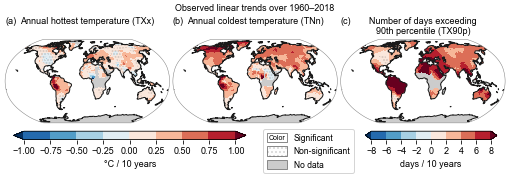

In [8]:
plot_temp(TXx_theil_1960, TX90p_theil_1960, TNn_theil_1960, "1960")

fN = conf.figure_filename("temperature_trends_1960", FIGURE_FOLDER)
plt.savefig(fN + ".pdf", dpi=600)
plt.savefig(fN + ".png", dpi=600, facecolor="w")